# T-Test Practice

Let's run a t-test to determine if there are differences between cars built between 1970-1976 and 1977-1982
1. Read in the data with this code:
2. Perform a t-test to determine whether cars built before 1977 have a different mean number of cylinders than cars built from 1977 onward (use a t-test from scipy.stats)
3. What is your t-statistic and p-value, and what do they mean?
4. What can you conclude about the differences in number of cylinders about cars built before 1977 vs after?
5. In the thread report your t-statistic, p-value and conclusion.

___

### Null + Alternative Hypotheses:

H0 - cars built before 1977 have the same mean number of cylinders than cars built after 1977.<br>
HA - cars built before 1977 have a different mean number of cylinders than cars built after 1977.

In [2]:
#import libraries:
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats

#load df:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', sep = '\s+',
                 names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 
                     'model_year', 'origin', 'car_name'])

#partition df into 2 parts per our criteria:
model_year_lt_77 = df.loc[df['model_year']<77]
model_year_gt_77 = df.loc[df['model_year']>=77]

# drop columns that don't matter:
model_year_lt_77 = model_year_lt_77.drop(axis=1, columns =['mpg','displacement','horsepower', 'weight', 'acceleration', 'origin', 'car_name'])
model_year_gt_77 = model_year_gt_77.drop(axis=1, columns=['mpg','displacement','horsepower', 'weight', 'acceleration', 'origin', 'car_name']) 

#run t-test, with equal_var set to False since we do not assume that each sample has the same variance
stats.ttest_ind(model_year_lt_77, model_year_gt_77, equal_var=False)

Ttest_indResult(statistic=array([  5.8639539, -34.4928266]), pvalue=array([9.54350114e-009, 2.41422530e-121]))

In [3]:
stats.ttest_ind(model_year_lt_77, model_year_gt_77, equal_var=False)

Ttest_indResult(statistic=array([  5.8639539, -34.4928266]), pvalue=array([9.54350114e-009, 2.41422530e-121]))

### CONCLUSION:

P-value is WAY less than 0.05, so the results are significant enough to reject the null. So cars made before 1977, and cars made after 1977 DO NOT have the same average number of cylinders.

___

# Pairplot of Cars

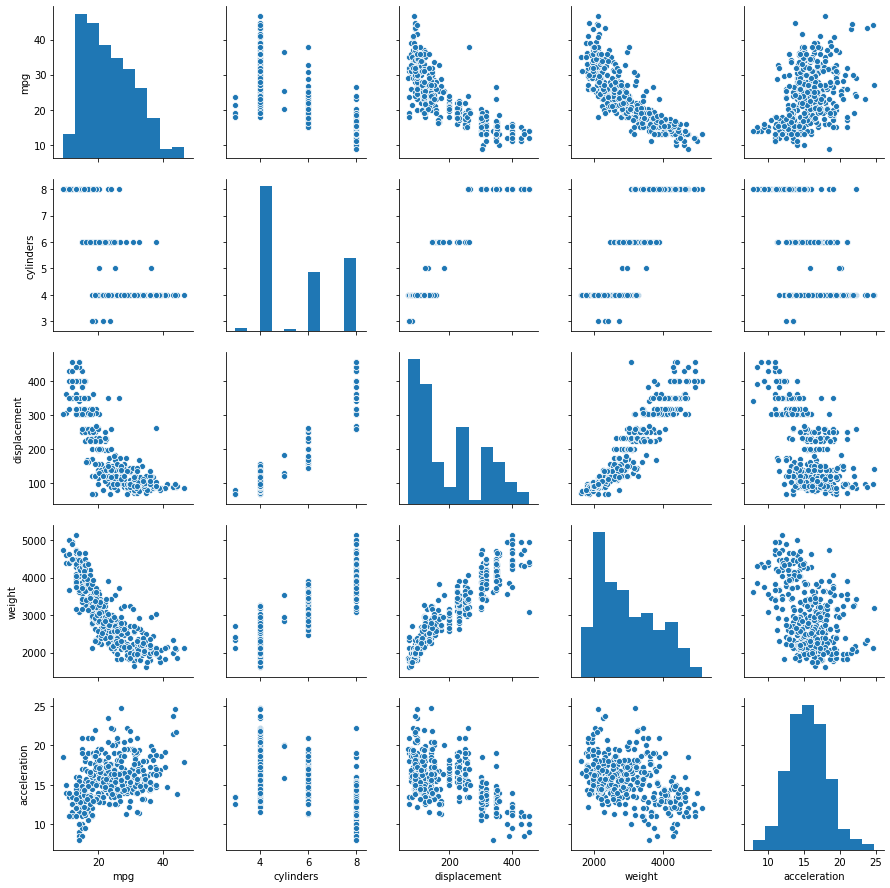

In [4]:
#import libraries as needed
import matplotlib.pyplot as plt
import seaborn as sn

#extract only the indepdendent variables we are interested in
test_variables = df[['mpg', 'cylinders', 'displacement', 'weight', 'acceleration']]

#pairplot of these variables to find any multicollinearity
sns.pairplot(test_variables)
plt.show()

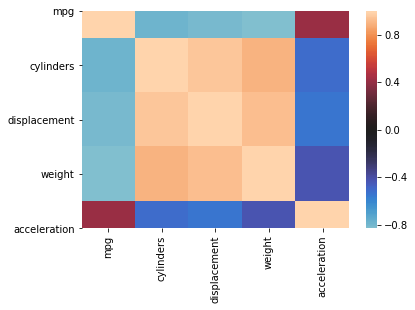

In [5]:
sns.heatmap(test_variables.corr(), center=0);
plt.show()

### Conclusion:

These variables all appear to be highly correlated with each other.

- cylinders
- displacement
- weight 

Recommend removing 2 of these 3, or combining them into one predictor.

___

# Linear Regression

Again using the auto data we used earlier this week, run a multiple linear regression model to predict mpg of a car using the features displacement, weight, and acceleration using statsmodels (note: we dropped cylinders because we found this to be highly correlated with other variables). REMEMBER to add a constant to your model! Examine the results and answer the following questions in the thread:
What is the R-squared value?
What does the R-squared value tell us?
Were all the features significant at the .05 alpha level?

In [1]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns

In [26]:
#this is finding the linear regression model using sklearn...but doesn't provide a robust statistics table like
#statsmodels package...so use statsmodels instead.

# lr = LinearRegression()
# x = df[['displacement', 'weight', 'acceleration']]
# y = pd.Series.to_numpy(df['mpg'])
# lr.fit(df[['displacement', 'weight', 'acceleration']], df['mpg'])
# print(lr.intercept_, lr.coef_)
# lr.score(x,y)

In [31]:
#using statsmodels

x = df[['displacement', 'weight', 'acceleration']] #predictor variables
y = pd.Series.to_numpy(df['mpg']) #target variable
x = sm.add_constant(x) #add (1) as the constant since we are using statsmodels
lr = sm.OLS(y, x, hasconst= True) #assign to the x and y variables with constant to the sm.OLS() function
results = lr.fit() #assign the result of the OLS to fit the data
results.summary() #show the summary

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     307.0
Date:                Fri, 17 Jan 2020   Prob (F-statistic):          1.01e-102
Time:                        09:53:13   Log-Likelihood:                -1142.7
No. Observations:                 398   AIC:                             2293.
Df Residuals:                     394   BIC:                             2309.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.2991      1.861     22.186      0.000      37.639      44.959
displacement    -0.0109      0.007     -1.675      0.095      -0.024       0.002
weight          -0.0062      0.001     -8.368      0.000      -0.008      -0.005
acceleration     0.1739      0.098      1.783      0.075      -0.018       0.366
==============================================================================
Omnibus:                       36.015   Durbin-Watson:                   0.815
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.328
Skew:                           0.681   Prob(JB):                     5.28e-11
Kurtosis:                       4.000   Cond. No.                     2.68e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<b>Interpretation:</b><br>
<br>
<i>The R-Squared value for our model is .700. R-Squared value tells us how well our model fits the training data. (All data really, we didn't split it here.) So an R-Squared of .700 (70%) of the variation in our target variable "mpg" is explained by "displacement", "weight", and "acceleration". Given that alpha is set to 0.05, only "weight" is significant, so we reject the null, "displacement" has a p-value of 0.095, and "acceleration" has a p-value of 0.075, which are both larger than 0.05, so we fail to reject the null for those two.